In [1]:
import pandas as pd
import numpy as np

In [4]:
data = {
    'ID': range(1, 21),
    'Nombre': ['Ana', 'Luis', 'Carlos', 'María', 'Elena', 'Jorge', 'Sofía', 'Andrés', 'Laura', 'Pedro',
               'Paula', 'Diego', 'Carmen', 'Marta', None, 'Pablo', 'Lucía', 'Manuel', 'Carla', 'David'],
    'Edad': [23, 35, 30, 22, 28, np.nan, 34, 45, 29, 41, 38, 25, 33, 27, 32, 36, np.nan, 39, 31, 40],
    'Salario': [5000, 6000, np.nan, 58000, 49000, 62000, 72000, 61000, 52000, 67000,
                55000, 53000, np.nan, 69000, 64000, 71000, 68000, 73000, np.nan, 66000],
    'Fecha_Ingreso': ['2020-01-10', '2019-06-15', '2020-03-25', None, '2018-07-30', '2017-09-14',
                      '2016-11-22', '2021-04-01', '2015-05-19', '2014-08-25', '2013-12-30', '2012-02-11',
                      '2011-10-17', None, '2020-09-09', '2018-04-05', '2019-11-22', '2010-07-27', '2020-05-13', '2017-01-29']
}
df = pd.DataFrame(data)
df.fillna({'Salario': df['Salario'].mean()}, inplace=True)

display(df)

,ID,Nombre,Edad,Salario,Fecha_Ingreso
0,1,Ana,23.0,5000.000000,2020-01-10
1,2,Luis,35.0,6000.000000,2019-06-15
2,3,Carlos,30.0,55941.176471,2020-03-25
3,4,María,22.0,58000.000000,None
4,5,Elena,28.0,49000.000000,2018-07-30
5,6,Jorge,NaN,62000.000000,2017-09-14
6,7,Sofía,34.0,72000.000000,2016-11-22
7,8,Andrés,45.0,61000.000000,2021-04-01
8,9,Laura,29.0,52000.000000,2015-05-19
9,10,Pedro,41.0,67000.000000,2014-08-25


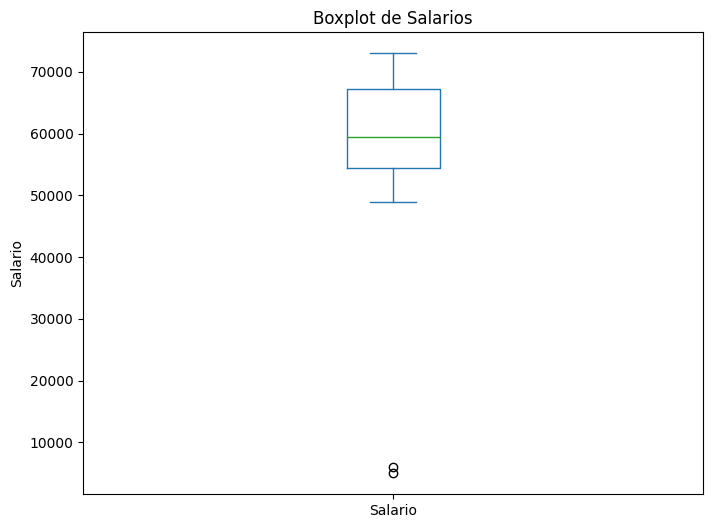

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['Salario'].plot(kind='box')
plt.title('Boxplot de Salarios')
plt.ylabel('Salario')
plt.show()

In [6]:
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Salario'] < lower_bound) | (df['Salario'] > upper_bound)]
display(outliers)

,ID,Nombre,Edad,Salario,Fecha_Ingreso
0,1,Ana,23.0,5000.0,2020-01-10
1,2,Luis,35.0,6000.0,2019-06-15


In [7]:
from scipy import stats

In [8]:
df['Z_Score'] = stats.zscore(df['Salario'])
display(df)

,ID,Nombre,Edad,Salario,Fecha_Ingreso,Z_Score
0,1,Ana,23.0,5000.000000,2020-01-10,-2.802322
1,2,Luis,35.0,6000.000000,2019-06-15,-2.747311
2,3,Carlos,30.0,55941.176471,2020-03-25,0.000000
3,4,María,22.0,58000.000000,None,0.113258
4,5,Elena,28.0,49000.000000,2018-07-30,-0.381841
5,6,Jorge,NaN,62000.000000,2017-09-14,0.333302
6,7,Sofía,34.0,72000.000000,2016-11-22,0.883411
7,8,Andrés,45.0,61000.000000,2021-04-01,0.278291
8,9,Laura,29.0,52000.000000,2015-05-19,-0.216808
9,10,Pedro,41.0,67000.000000,2014-08-25,0.608356


In [10]:
outliers_zscore = df[df['Z_Score'].abs() > 1]
display(outliers_zscore)

,ID,Nombre,Edad,Salario,Fecha_Ingreso,Z_Score
0,1,Ana,23.0,5000.0,2020-01-10,-2.802322
1,2,Luis,35.0,6000.0,2019-06-15,-2.747311
